## TASK:1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

Widget Sales Data:
   widget_sales
0     50.496714
1     50.805493
2     51.477758
3     53.542228
4     54.873108

Foot Traffic Data:
   foot_traffic
0    500.496714
1    500.522366
2    501.426876
3    503.295990
4    504.132695

Bandwidth Usage Data:
   hourly_bandwidth
0       1000.496714
1       1000.969408
2       1002.046019
3       1004.702118
4       1007.447816


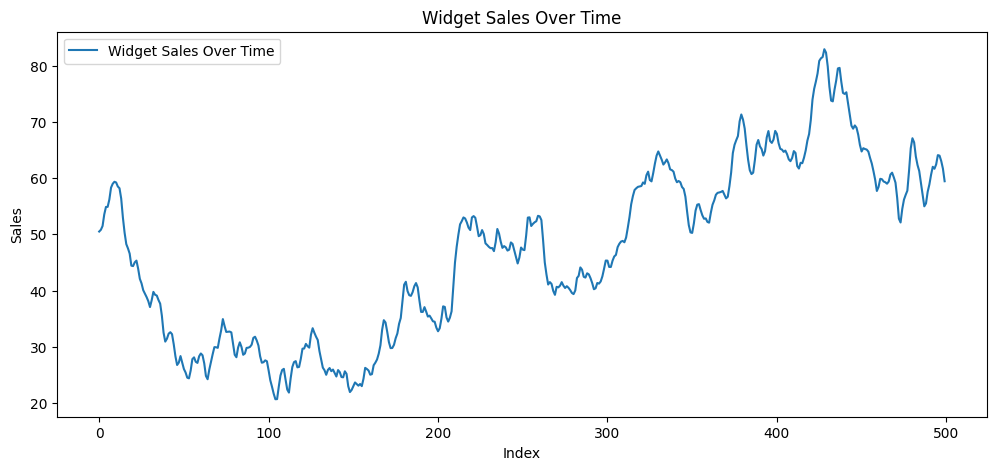

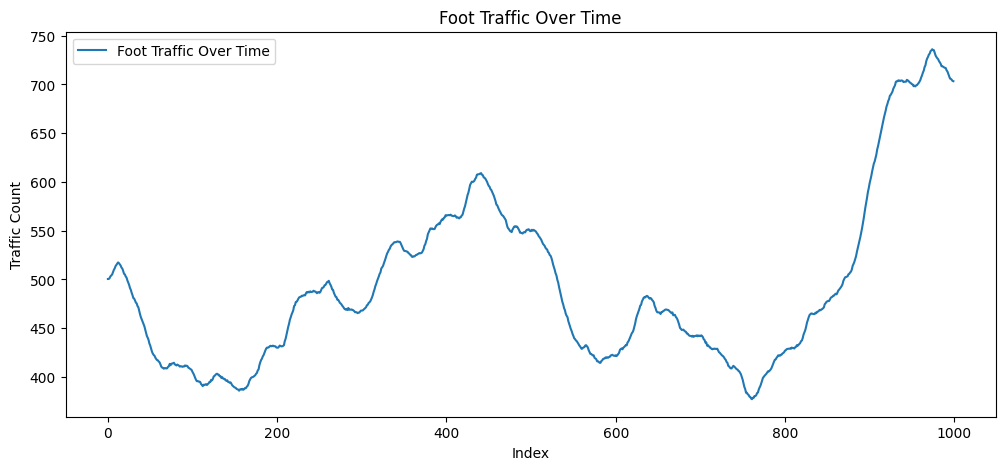

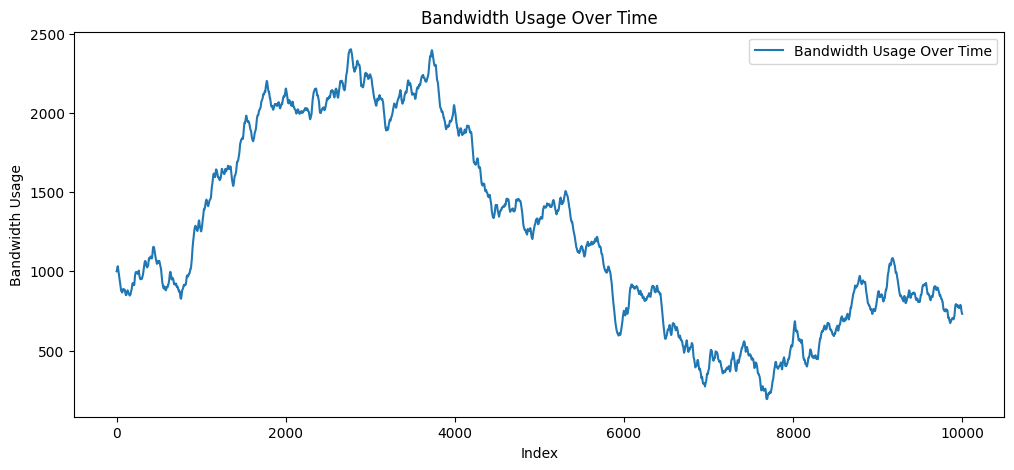

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

w="/content/drive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/lab04/widget_sales.csv"
f="/content/drive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/lab04/foot_traffic.csv"
b="/content/drive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/lab04/bandwidth.csv"

# Load datasets
widget_sales = pd.read_csv(w)
foot_traffic = pd.read_csv(f)
bandwidth = pd.read_csv(b)

# Use index directly
widget_sales.index = range(len(widget_sales))
foot_traffic.index = range(len(foot_traffic))
bandwidth.index = range(len(bandwidth))

# Display first few rows
print("Widget Sales Data:")
print(widget_sales.head())
print("\nFoot Traffic Data:")
print(foot_traffic.head())
print("\nBandwidth Usage Data:")
print(bandwidth.head())

# Plot time series
def plot_time_series(data, title, ylabel):
    plt.figure(figsize=(12, 5))
    plt.plot(data, label=title)
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

plot_time_series(widget_sales, "Widget Sales Over Time", "Sales")
plot_time_series(foot_traffic, "Foot Traffic Over Time", "Traffic Count")
plot_time_series(bandwidth, "Bandwidth Usage Over Time", "Bandwidth Usage")


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/lab04/widget_sales.csv')
print(df.head())  # View first few rows
print(df.columns)  # Check column names


   widget_sales
0     50.496714
1     50.805493
2     51.477758
3     53.542228
4     54.873108
Index(['widget_sales'], dtype='object')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/lab04/bandwidth.csv')
print(df.head())  # View first few rows
print(df.columns)  # Check column names


   hourly_bandwidth
0       1000.496714
1       1000.969408
2       1002.046019
3       1004.702118
4       1007.447816
Index(['hourly_bandwidth'], dtype='object')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/lab04/foot_traffic.csv')
print(df.head())  # View first few rows
print(df.columns)  # Check column names

   foot_traffic
0    500.496714
1    500.522366
2    501.426876
3    503.295990
4    504.132695
Index(['foot_traffic'], dtype='object')


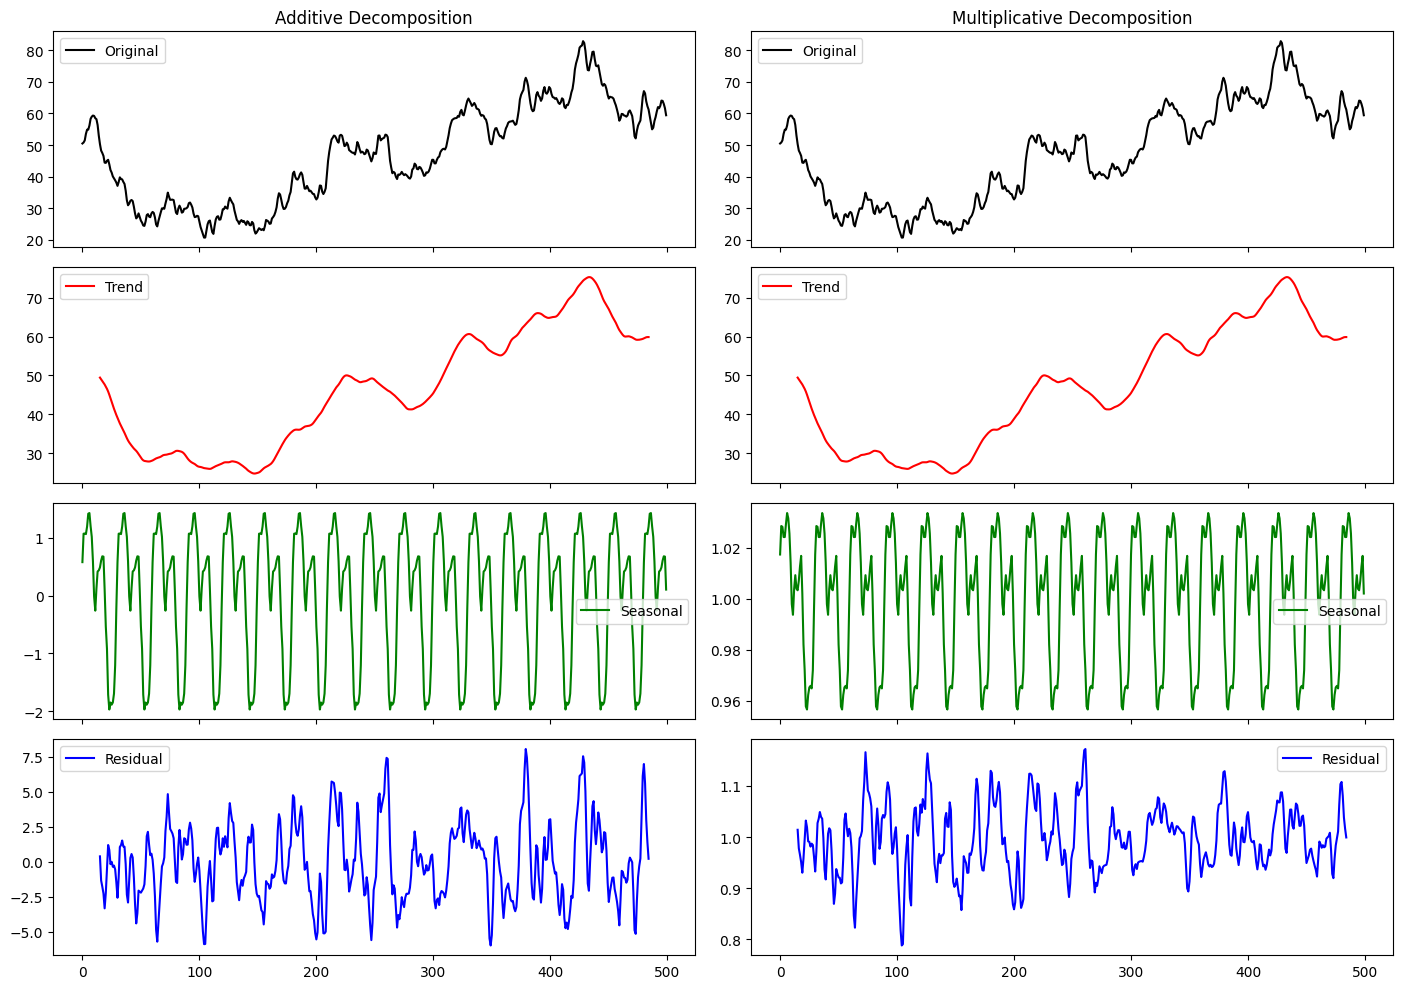

In [7]:
additive_decomposition_widget_sales = seasonal_decompose(widget_sales['widget_sales'], model="additive", period=30)

multiplicative_decomposition_widget_sales = seasonal_decompose(widget_sales['widget_sales'], model="multiplicative", period=30)

fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

axes[0, 0].set_title("Additive Decomposition")
axes[0, 0].plot(widget_sales['widget_sales'], label="Original", color="black")
axes[0, 1].set_title("Multiplicative Decomposition")
axes[0, 1].plot(widget_sales['widget_sales'], label="Original", color="black")

axes[1, 0].plot(additive_decomposition_widget_sales.trend, label="Trend", color="red")
axes[1, 1].plot(multiplicative_decomposition_widget_sales.trend, label="Trend", color="red")

axes[2, 0].plot(additive_decomposition_widget_sales.seasonal, label="Seasonal", color="green")
axes[2, 1].plot(multiplicative_decomposition_widget_sales.seasonal, label="Seasonal", color="green")

axes[3, 0].plot(additive_decomposition_widget_sales.resid, label="Residual", color="blue")
axes[3, 1].plot(multiplicative_decomposition_widget_sales.resid, label="Residual", color="blue")

for ax in axes.flatten():
    ax.legend()

plt.tight_layout()
plt.show()

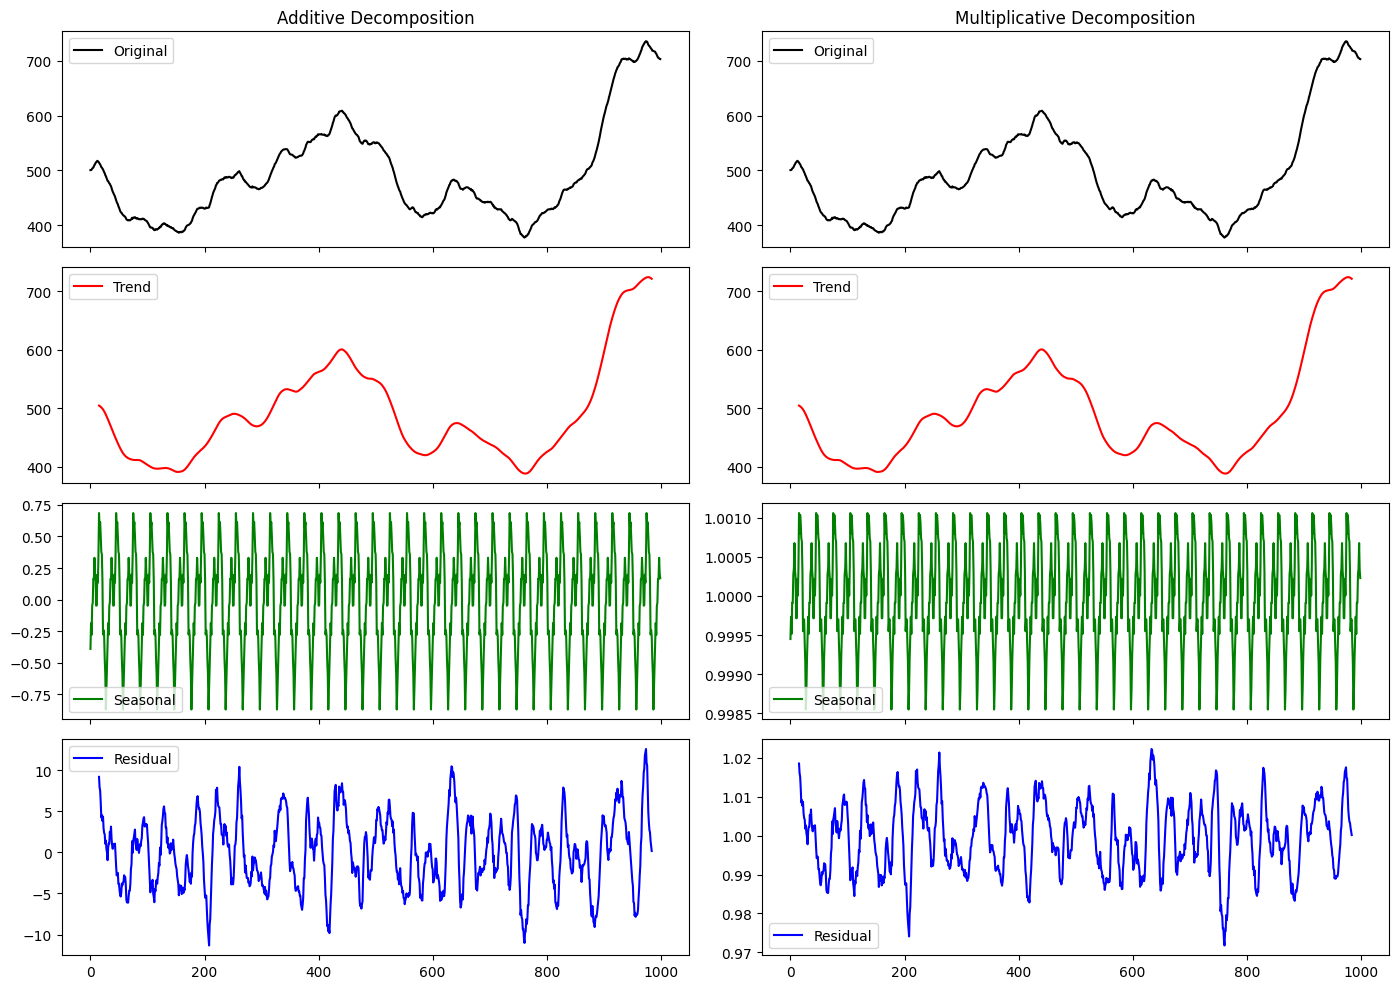

In [8]:
additive_decomposition_foot_traffic = seasonal_decompose(foot_traffic['foot_traffic'], model="additive", period=30)

multiplicative_decomposition_foot_traffic = seasonal_decompose(foot_traffic['foot_traffic'], model="multiplicative", period=30)

fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

axes[0, 0].set_title("Additive Decomposition")
axes[0, 0].plot(foot_traffic['foot_traffic'], label="Original", color="black")
axes[0, 1].set_title("Multiplicative Decomposition")
axes[0, 1].plot(foot_traffic['foot_traffic'], label="Original", color="black")

axes[1, 0].plot(additive_decomposition_foot_traffic.trend, label="Trend", color="red")
axes[1, 1].plot(multiplicative_decomposition_foot_traffic.trend, label="Trend", color="red")

axes[2, 0].plot(additive_decomposition_foot_traffic.seasonal, label="Seasonal", color="green")
axes[2, 1].plot(multiplicative_decomposition_foot_traffic.seasonal, label="Seasonal", color="green")

axes[3, 0].plot(additive_decomposition_foot_traffic.resid, label="Residual", color="blue")
axes[3, 1].plot(multiplicative_decomposition_foot_traffic.resid, label="Residual", color="blue")

for ax in axes.flatten():
    ax.legend()

plt.tight_layout()
plt.show()

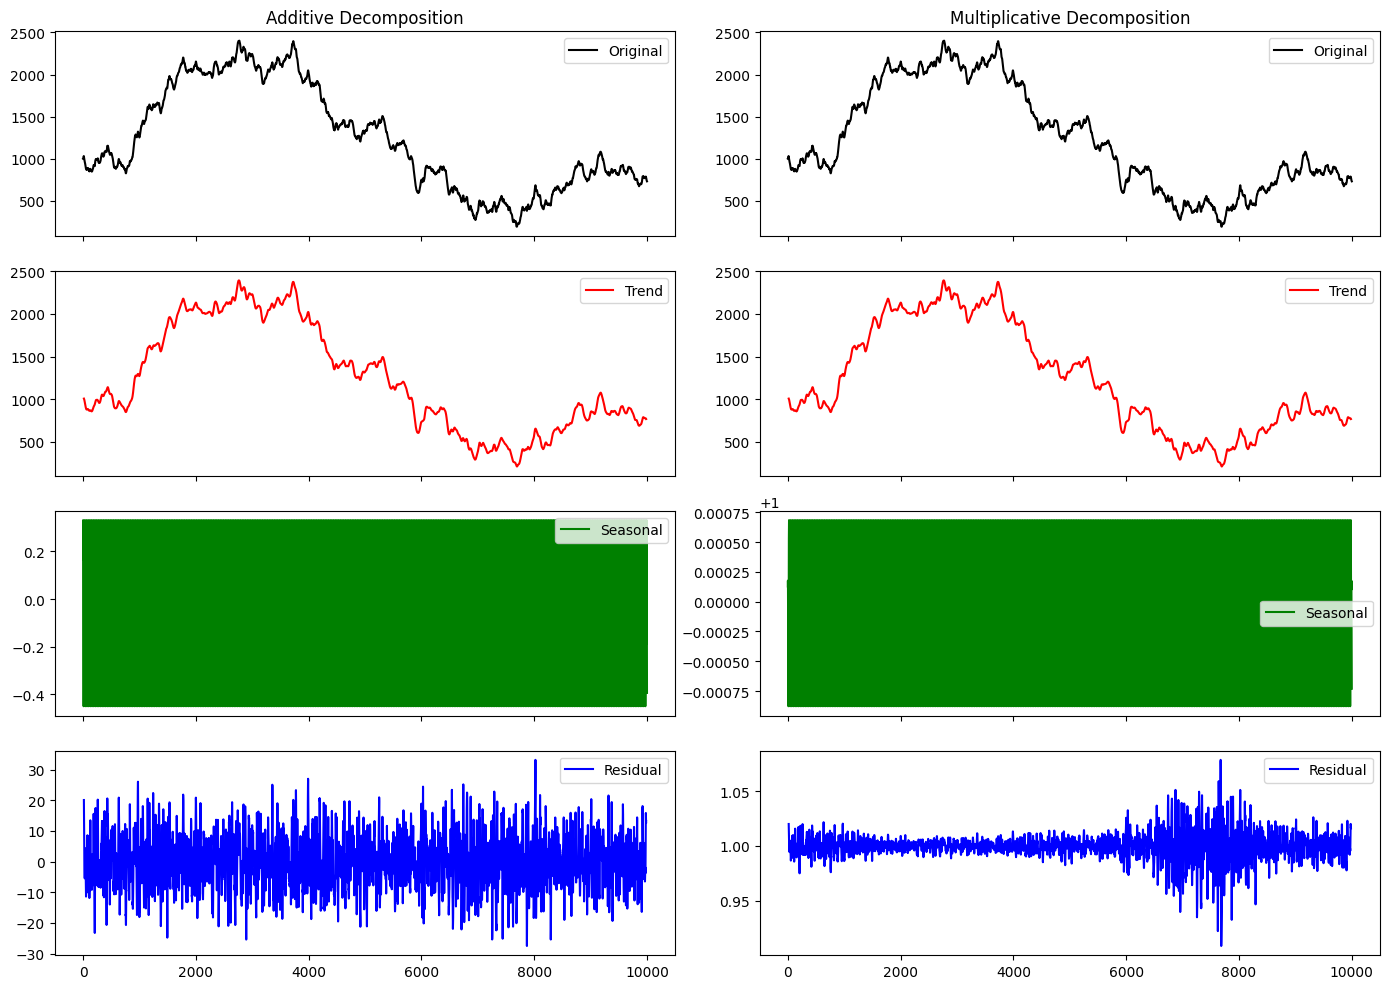

In [10]:
additive_decomposition_bandwidth = seasonal_decompose(bandwidth['hourly_bandwidth'], model="additive", period=30)

multiplicative_decomposition_bandwidth = seasonal_decompose(bandwidth['hourly_bandwidth'], model="multiplicative", period=30)

fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharex=True)

axes[0, 0].set_title("Additive Decomposition")
axes[0, 0].plot(bandwidth['hourly_bandwidth'], label="Original", color="black")
axes[0, 1].set_title("Multiplicative Decomposition")
axes[0, 1].plot(bandwidth['hourly_bandwidth'], label="Original", color="black")

axes[1, 0].plot(additive_decomposition_bandwidth.trend, label="Trend", color="red")
axes[1, 1].plot(multiplicative_decomposition_bandwidth.trend, label="Trend", color="red")

axes[2, 0].plot(additive_decomposition_bandwidth.seasonal, label="Seasonal", color="green")
axes[2, 1].plot(multiplicative_decomposition_bandwidth.seasonal, label="Seasonal", color="green")

axes[3, 0].plot(additive_decomposition_bandwidth.resid, label="Residual", color="blue")
axes[3, 1].plot(multiplicative_decomposition_bandwidth.resid, label="Residual", color="blue")

for ax in axes.flatten():
    ax.legend()

plt.tight_layout()
plt.show()

## Observations from the Time Series Plots

- What patterns do we observe in the time series plots?
- Does the data exhibit any trend or seasonality?

### Answer:

From the time series plot, we can observe a long-term trend characterized by noticeable peaks and troughs. This suggests that the data is not purely random but follows an underlying pattern over time.

A key observation is that the time series does not appear to be stationary, as there is a visible trend. In a stationary process, the statistical properties, such as mean and variance, remain constant over time, which is not the case here.

Additionally, there is no clear evidence of a repeating cyclical pattern at regular intervals. This suggests that the dataset does not exhibit strong seasonality, at least based on visual inspection. However, further statistical tests such as decomposition or autocorrelation analysis would be needed to confirm this observation.


### **Task 2: Checking for Stationarity**

#### 1. Apply the Augmented Dickey-Fuller (ADF) test to determine whether the dataset is stationary in case of each dataset.

- What is the p-value of the ADF test ?
- Based on the results, is the dataset stationary or not ?

In [11]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey-Fuller Test
def adf_test(series, title):
    result = adfuller(series.dropna())
    print(f"\nADF Test for {title}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is non-stationary. Applying first-order differencing...")
        diff_series = series.diff().dropna()
        result_diff = adfuller(diff_series)
        print(f"\nADF Test after Differencing for {title}:")
        print(f"ADF Statistic: {result_diff[0]}")
        print(f"p-value: {result_diff[1]}")
        print("Critical Values:")
        for key, value in result_diff[4].items():
            print(f"   {key}: {value}")
        if result_diff[1] <= 0.05:
            print("The differenced data is stationary.")
        else:
            print("The data is still non-stationary.")

# Apply ADF test on each dataset
adf_test(widget_sales.iloc[:, 0], "Widget Sales")
adf_test(foot_traffic.iloc[:, 0], "Foot Traffic")
adf_test(bandwidth.iloc[:, 0], "Bandwidth Usage")



ADF Test for Widget Sales:
ADF Statistic: -1.5121662069359048
p-value: 0.5274845352272605
Critical Values:
   1%: -3.4436029548776395
   5%: -2.867384756137026
   10%: -2.5698830308597813
The data is non-stationary. Applying first-order differencing...

ADF Test after Differencing for Widget Sales:
ADF Statistic: -10.576657780341959
p-value: 7.076922818587193e-19
Critical Values:
   1%: -3.4436029548776395
   5%: -2.867384756137026
   10%: -2.5698830308597813
The differenced data is stationary.

ADF Test for Foot Traffic:
ADF Statistic: -1.1758885999240747
p-value: 0.683880891789619
Critical Values:
   1%: -3.4369325637409154
   5%: -2.8644462162311934
   10%: -2.568317409920808
The data is non-stationary. Applying first-order differencing...

ADF Test after Differencing for Foot Traffic:
ADF Statistic: -5.268231347422044
p-value: 6.369317654781239e-06
Critical Values:
   1%: -3.4369325637409154
   5%: -2.8644462162311934
   10%: -2.568317409920808
The differenced data is stationary.


### **Task 3: Identifying Random Walk Behavior**

#### 1. Check whether the which of the provided dataset follows a random walk by analyzing its autocorrelation.
#### 2. Plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) in case of each dataset.

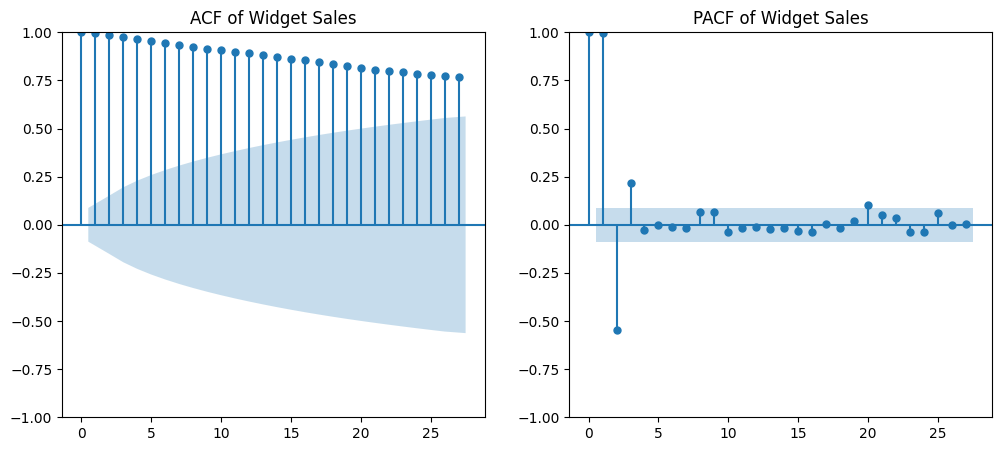

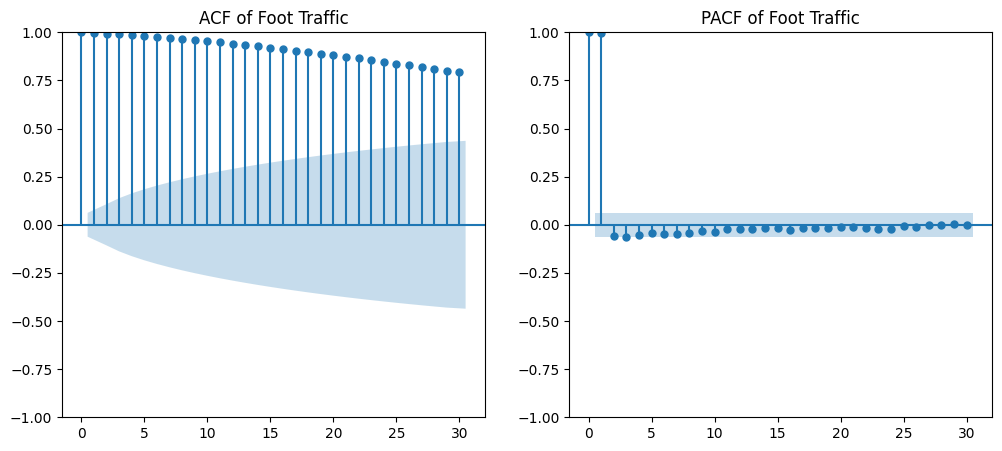

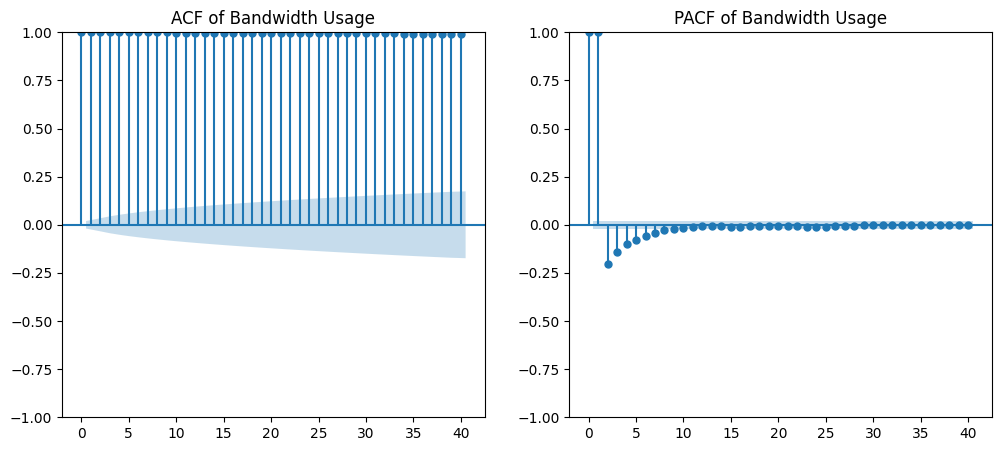

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
def plot_acf_pacf(series, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plot_acf(series, ax=axes[0], title=f"ACF of {title}")
    plot_pacf(series, ax=axes[1], title=f"PACF of {title}")
    plt.show()

plot_acf_pacf(widget_sales.iloc[:, 0], "Widget Sales")
plot_acf_pacf(foot_traffic.iloc[:, 0], "Foot Traffic")
plot_acf_pacf(bandwidth.iloc[:, 0], "Bandwidth Usage")

In all the three datasets, after taking the first difference there are still significant autocorrelation between the values, so the given datasets does not follow Random Walk.

## Interpretation of ACF and PACF Plots

- What insights do the ACF and PACF plots provide?
- How can we interpret the behavior of different lags?

### Answer:

### Widget Sales:
The **Autocorrelation Function (ACF) plot** shows significant autocorrelation values up to lag \( q \), beyond which the coefficients drop to non-significant levels. This pattern is characteristic of a **Moving Average (MA) process** of order \( q \), denoted as **MA(q)**. The presence of significant autocorrelation at the initial lags suggests that past error terms influence the present values.

### Foot Traffic:
For the **Foot Traffic** data, the ACF plot of a stationary time series exhibits an **exponential decay pattern**. This is a common indication of an **Autoregressive (AR) process**, where current values depend on past values with diminishing influence over time. Since the autocorrelation coefficients become insignificant beyond **lag 3**, we can infer that the process follows a **third-order autoregressive model**, or **AR(3)**.

### Bandwidth:
In the case of **Bandwidth data**, both the **ACF and Partial Autocorrelation Function (PACF) plots** display a gradually decaying or sinusoidal pattern. This suggests that the data follows a combination of **AR and MA processes**, making it an **Autoregressive Moving Average (ARMA) process** of order \( (p, q) \). The presence of both autoregressive and moving average components implies that the time series is stationary but exhibits a complex dependence on past observations and error terms.

To confirm these findings, further statistical tests such as the Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC) can be used to determine the optimal values for \( p \) and \( q \).


### **Task 4: Figuring out Correct Models on datasets**

#### 1. In case of all three provided datasets, you need to identify the appropriate process to be applied. Figure out whether you should apply either AR or MA or ARMA Model in case of each dataset with reasoning .
#### 2. Fit the model according to the dataset and check its performance.
#### 3. Evaluate the model using Mean Squared Error (MSE) and Mean Absolute Error (MAE).

- How have you selected the order of the MA or AR or ARMA process ?
- After fine tuning the order (p ,q) of the ARIMA process, carry out the residual analysis and QQ plots to validate your prediction.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Model Summary for Widget Sales:
                               SARIMAX Results                                
Dep. Variable:           widget_sales   No. Observations:                  500
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1452.237
Date:                Fri, 14 Mar 2025   AIC                           2912.473
Time:                        17:01:29   BIC                           2929.332
Sample:                             0   HQIC                          2919.089
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.9983      0.737     63.802      0.000      45.555      48.442
ma.L1          1.7896      0.020     89.972      0.000       1.751       1.829
ma.L2          0.90

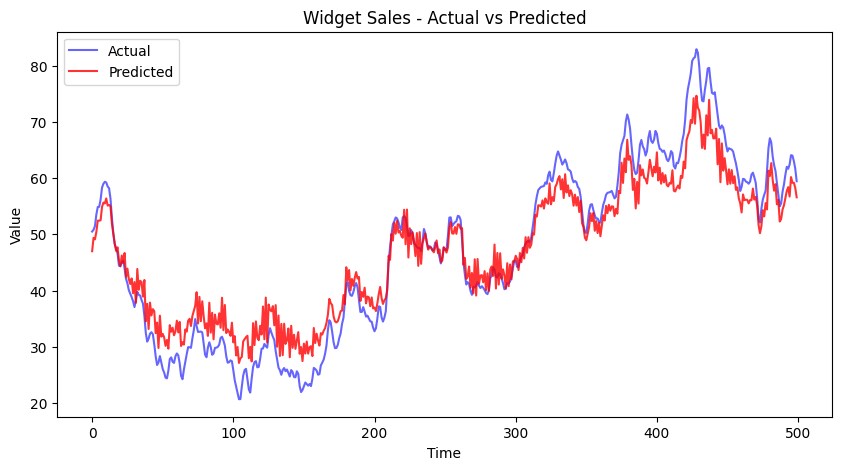

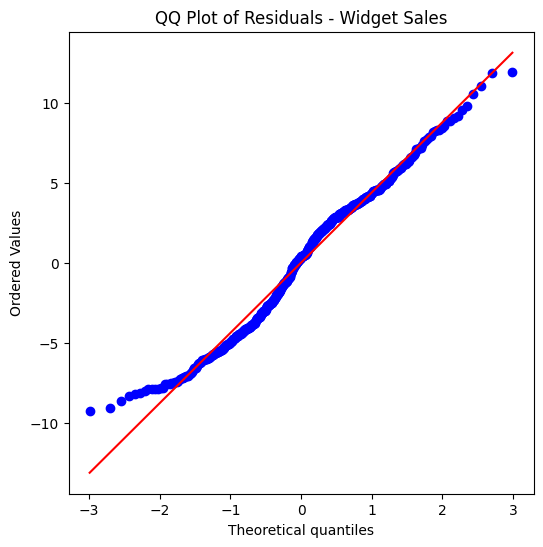

MSE: 1.0169176032953977
MAE: 0.7917667059332171


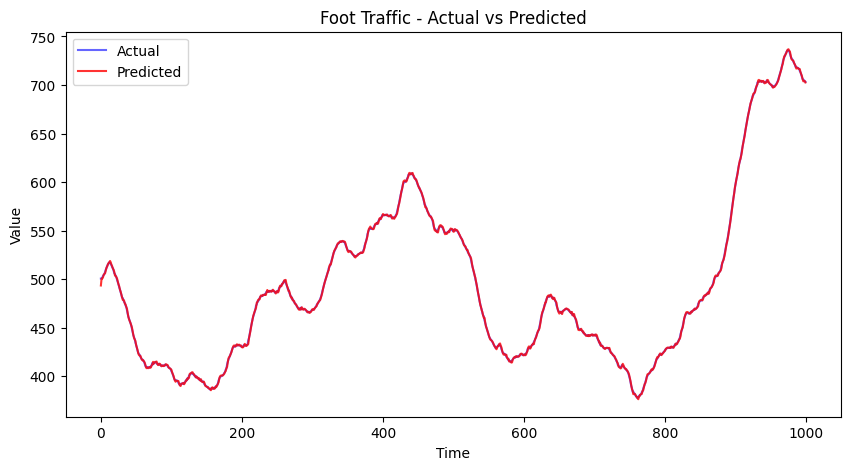

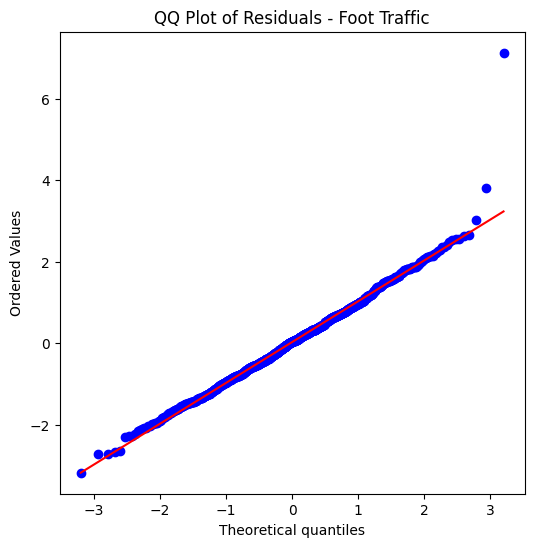

MSE: 6.401281641544075
MAE: 0.8255065235055515


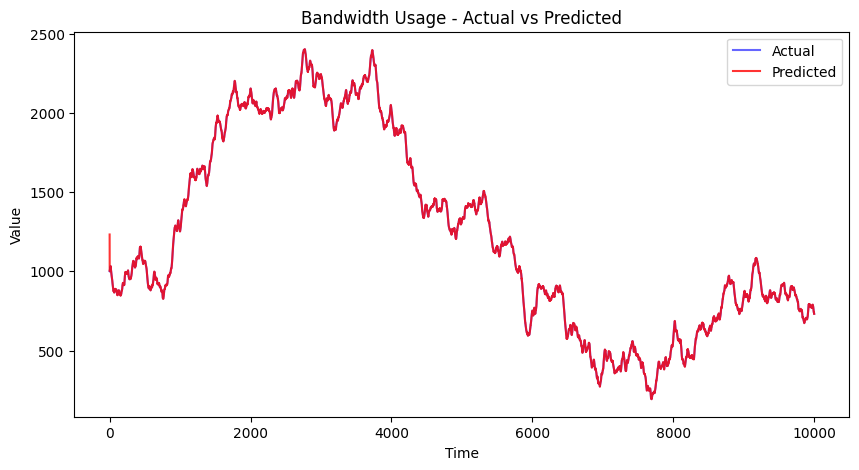

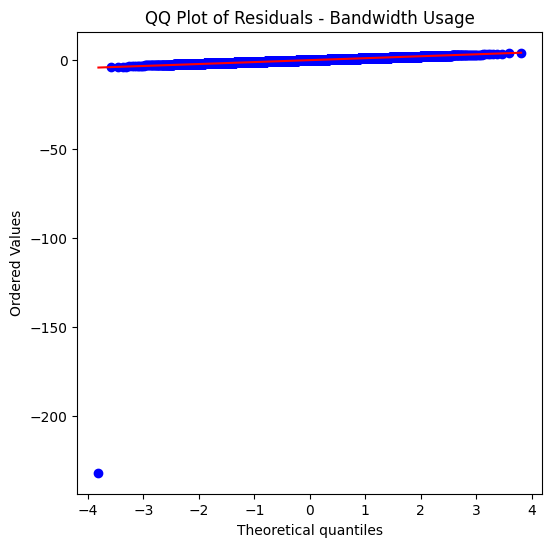

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

# Fit models with specified orders
def fit_model(series, title, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    print(f"\nModel Summary for {title}:")
    print(model_fit.summary())
    return model_fit

# Identify model orders
widget_model = fit_model(widget_sales.iloc[:, 0], "Widget Sales", (0, 0, 2))  # MA(2)
foot_traffic_model = fit_model(foot_traffic.iloc[:, 0], "Foot Traffic", (3, 0, 0))  # AR(3)
bandwidth_model = fit_model(bandwidth.iloc[:, 0], "Bandwidth Usage", (2, 0, 2))  # ARMA(2,2)

# Evaluate models and plot results
def evaluate_model(model_fit, series, title):
    predictions = model_fit.fittedvalues
    mse = mean_squared_error(series, predictions)
    mae = mean_absolute_error(series, predictions)
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")

    # Combined actual vs predicted plot
    plt.figure(figsize=(10, 5))
    plt.plot(series, label='Actual', color='blue', alpha=0.6)
    plt.plot(predictions, label='Predicted', color='red', alpha=0.8)
    plt.legend()
    plt.title(f'{title} - Actual vs Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

    # QQ Plot for residuals
    residuals = model_fit.resid
    plt.figure(figsize=(6, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'QQ Plot of Residuals - {title}')
    plt.show()

evaluate_model(widget_model, widget_sales.iloc[:, 0], "Widget Sales")
evaluate_model(foot_traffic_model, foot_traffic.iloc[:, 0], "Foot Traffic")
evaluate_model(bandwidth_model, bandwidth.iloc[:, 0], "Bandwidth Usage")
